Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from dateutil import parser 
 

Importing datasets

In [65]:
dataset = pd.read_csv('appdata10.csv')

dataset.head()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [66]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


data cleaning

In [67]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int) 

Plotting

In [68]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


Histogram

C:\Users\Siddharth tyagi\AppData\Local\Temp\ipykernel_23448\233093404.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


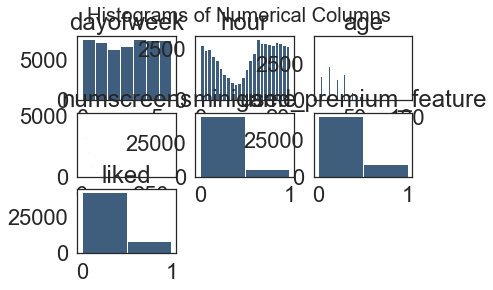

In [69]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Correlation with responses

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

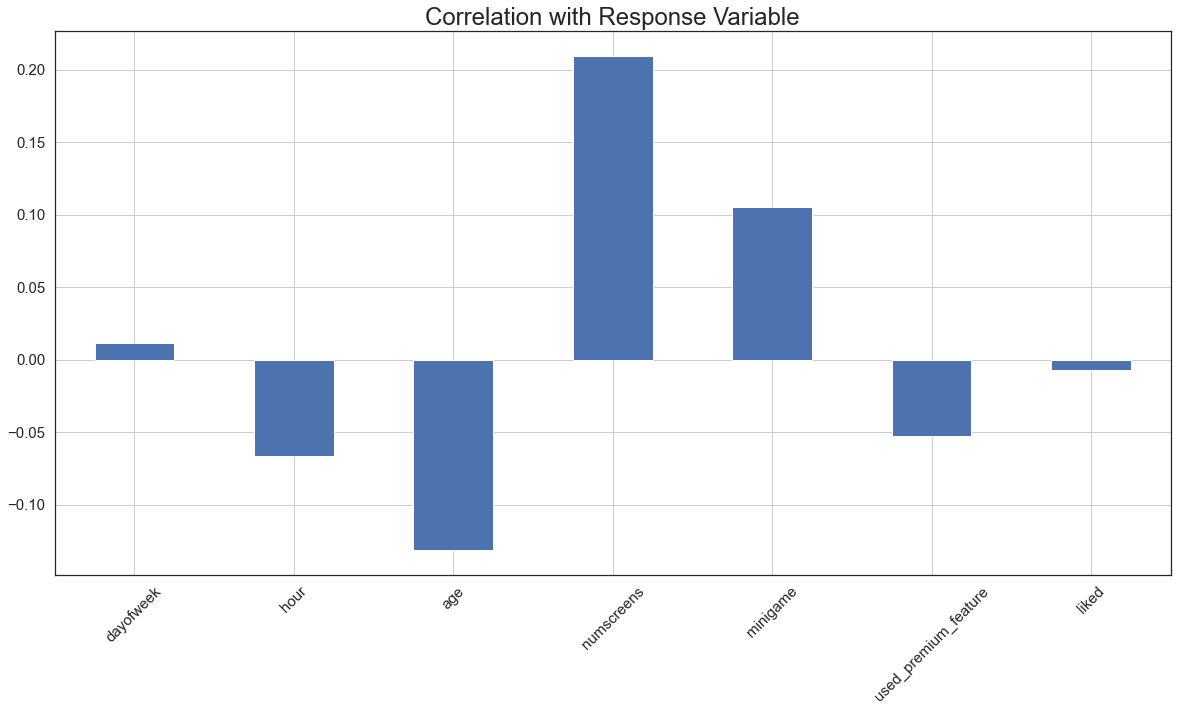

In [70]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),title = 'Correlation with Response Variable',fontsize = 15 , rot = 45,grid = True)

Correlation Matrices

C:\Users\Siddharth tyagi\AppData\Local\Temp\ipykernel_23448\3618099263.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

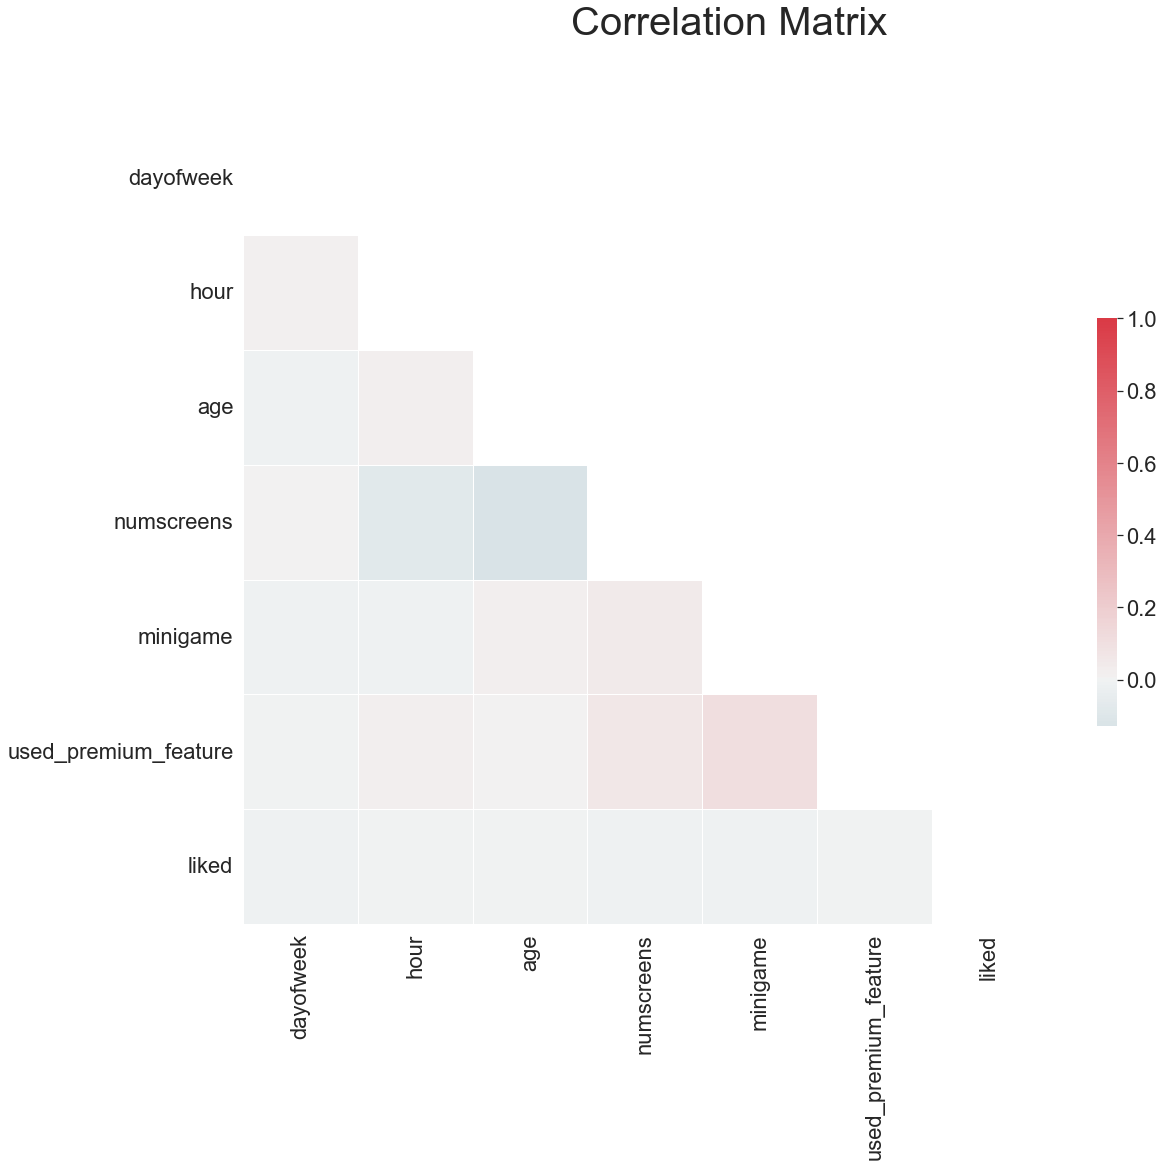

In [71]:
sea.set(style ="white" , font_scale = 2)

corr = dataset2.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix" , fontsize = 40)

cmap = sea.diverging_palette(220,10,as_cmap=True)
sea.heatmap(corr,mask=mask,cmap=cmap , vmax=1 , center=0 , square= True, linewidths=.5 , cbar_kws={"shrink":.5})

Feature Engineering 

In [72]:
dataset.dtypes
dataset["first_open"] = [parser.parse(row_data)for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data)if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]


In [73]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [74]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

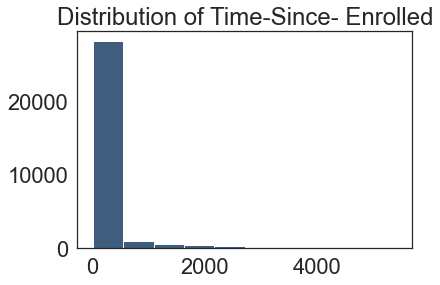

In [75]:
plt.hist(dataset["difference"].dropna() , color  = '#3F5D7D')
plt.title('Distribution of Time-Since- Enrolled')
plt.show()

In [76]:
dataset.loc[dataset.difference>48,'enrolled']=0
dataset = dataset.drop(columns=['difference', 'enrolled_date','first_open'])

Formating the Screen_list Field

In [77]:
top_screen = pd.read_csv('top_screens.csv')

In [78]:
dataset["screen_list"] = dataset.screen_list.astype(str)+','
for sc in top_screen:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")



dataset["Other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=["screen_list"])